In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vincent1337/irish-wildlife-statistics")

print("Path to dataset files:", path)

100%|██████████| 493/493 [00:00<00:00, 914kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vincent1337/irish-wildlife-statistics/versions/2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
csv_path = f"{path}/irish_animals.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_path)

In [6]:
df.head()

,Name,Population,Size (min cm),Size (max cm),Weight (min kg),Weight (max kg),Lifespan (min years),Lifespan (max years)
0,Irish Red Fox,185000,48.0,92.0,4.2000,6.8000,3.0,5.0
1,Irish Badger,95000,62.0,88.0,8.5000,13.5000,6.0,8.0
2,Irish Otter,13500,58.0,98.0,5.5000,11.5000,9.0,13.0
3,Irish Pygmy Shrew,5500000,4.2,6.3,0.0032,0.0065,1.1,1.6
4,Irish Hare,92000,52.0,64.0,2.2000,4.5000,4.0,6.0


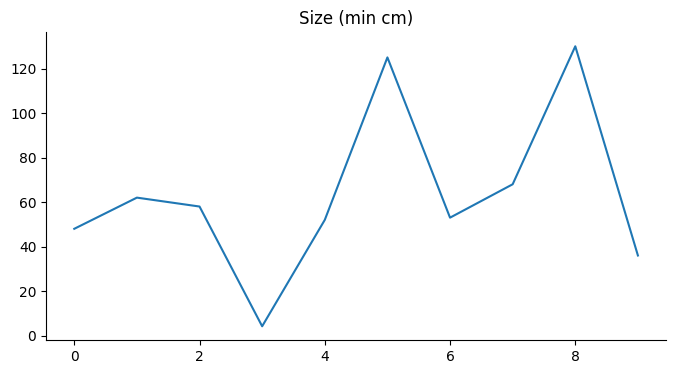

In [7]:
# @title Size (min cm)

from matplotlib import pyplot as plt
df['Size (min cm)'].plot(kind='line', figsize=(8, 4), title='Size (min cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  10 non-null     object 
 1   Population            10 non-null     int64  
 2   Size (min cm)         10 non-null     float64
 3   Size (max cm)         10 non-null     float64
 4   Weight (min kg)       10 non-null     float64
 5   Weight (max kg)       10 non-null     float64
 6   Lifespan (min years)  10 non-null     float64
 7   Lifespan (max years)  10 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 772.0+ bytes
None


In [9]:
print(df.describe())

         Population  Size (min cm)  Size (max cm)  Weight (min kg)  \
count  1.000000e+01      10.000000      10.000000        10.000000   
mean   5.904370e+05      63.620000      91.830000        12.845320   
std    1.726136e+06      38.024255      49.799823        29.001092   
min    2.000000e+01       4.200000       6.300000         0.003200   
25%    2.875000e+03      49.000000      64.250000         1.750000   
50%    1.300000e+04      55.500000      90.000000         3.700000   
75%    9.425000e+04      66.500000     103.250000         7.000000   
max    5.500000e+06     130.000000     175.000000        95.000000   

       Weight (max kg)  Lifespan (min years)  Lifespan (max years)  
count        10.000000             10.000000             10.000000  
mean         26.550650              8.710000             13.060000  
std          62.877535              6.042157              9.018031  
min           0.006500              1.100000              1.600000  
25%           3.225000  

In [10]:
# Check for missing values in each column
print(df.isnull().sum())

Name                    0
Population              0
Size (min cm)           0
Size (max cm)           0
Weight (min kg)         0
Weight (max kg)         0
Lifespan (min years)    0
Lifespan (max years)    0
dtype: int64


In [12]:
df.duplicated().sum()

0

In [13]:
print(df.dtypes)

Name                     object
Population                int64
Size (min cm)           float64
Size (max cm)           float64
Weight (min kg)         float64
Weight (max kg)         float64
Lifespan (min years)    float64
Lifespan (max years)    float64
dtype: object


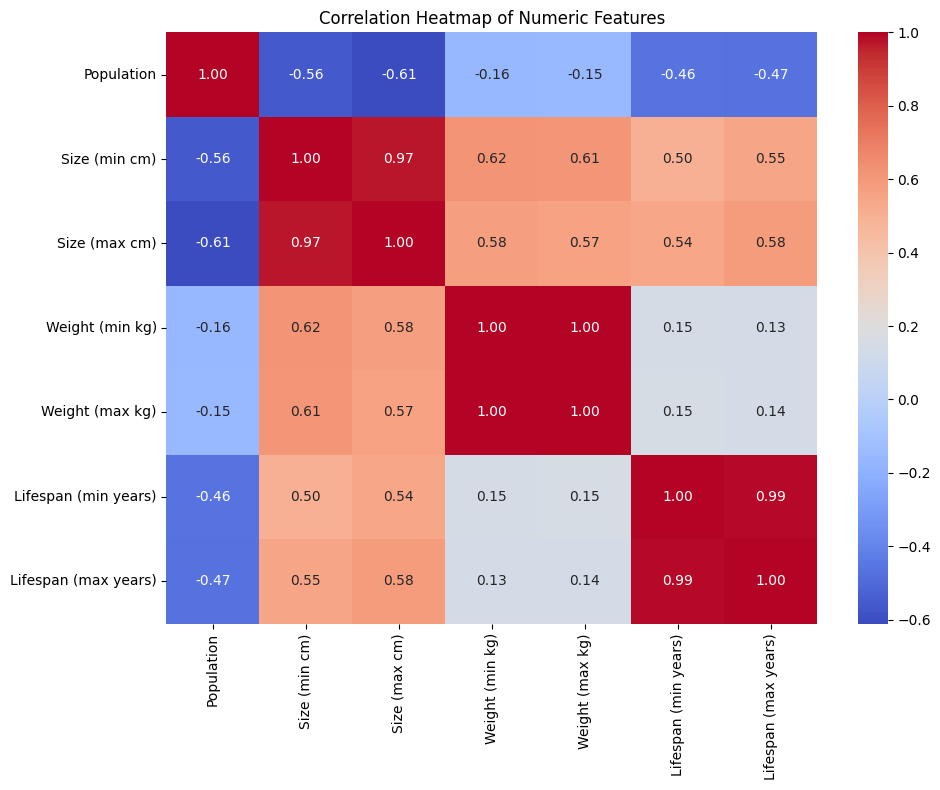

In [14]:
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap (only if there are 4 or more numeric columns)
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric values for a correlation heatmap.')

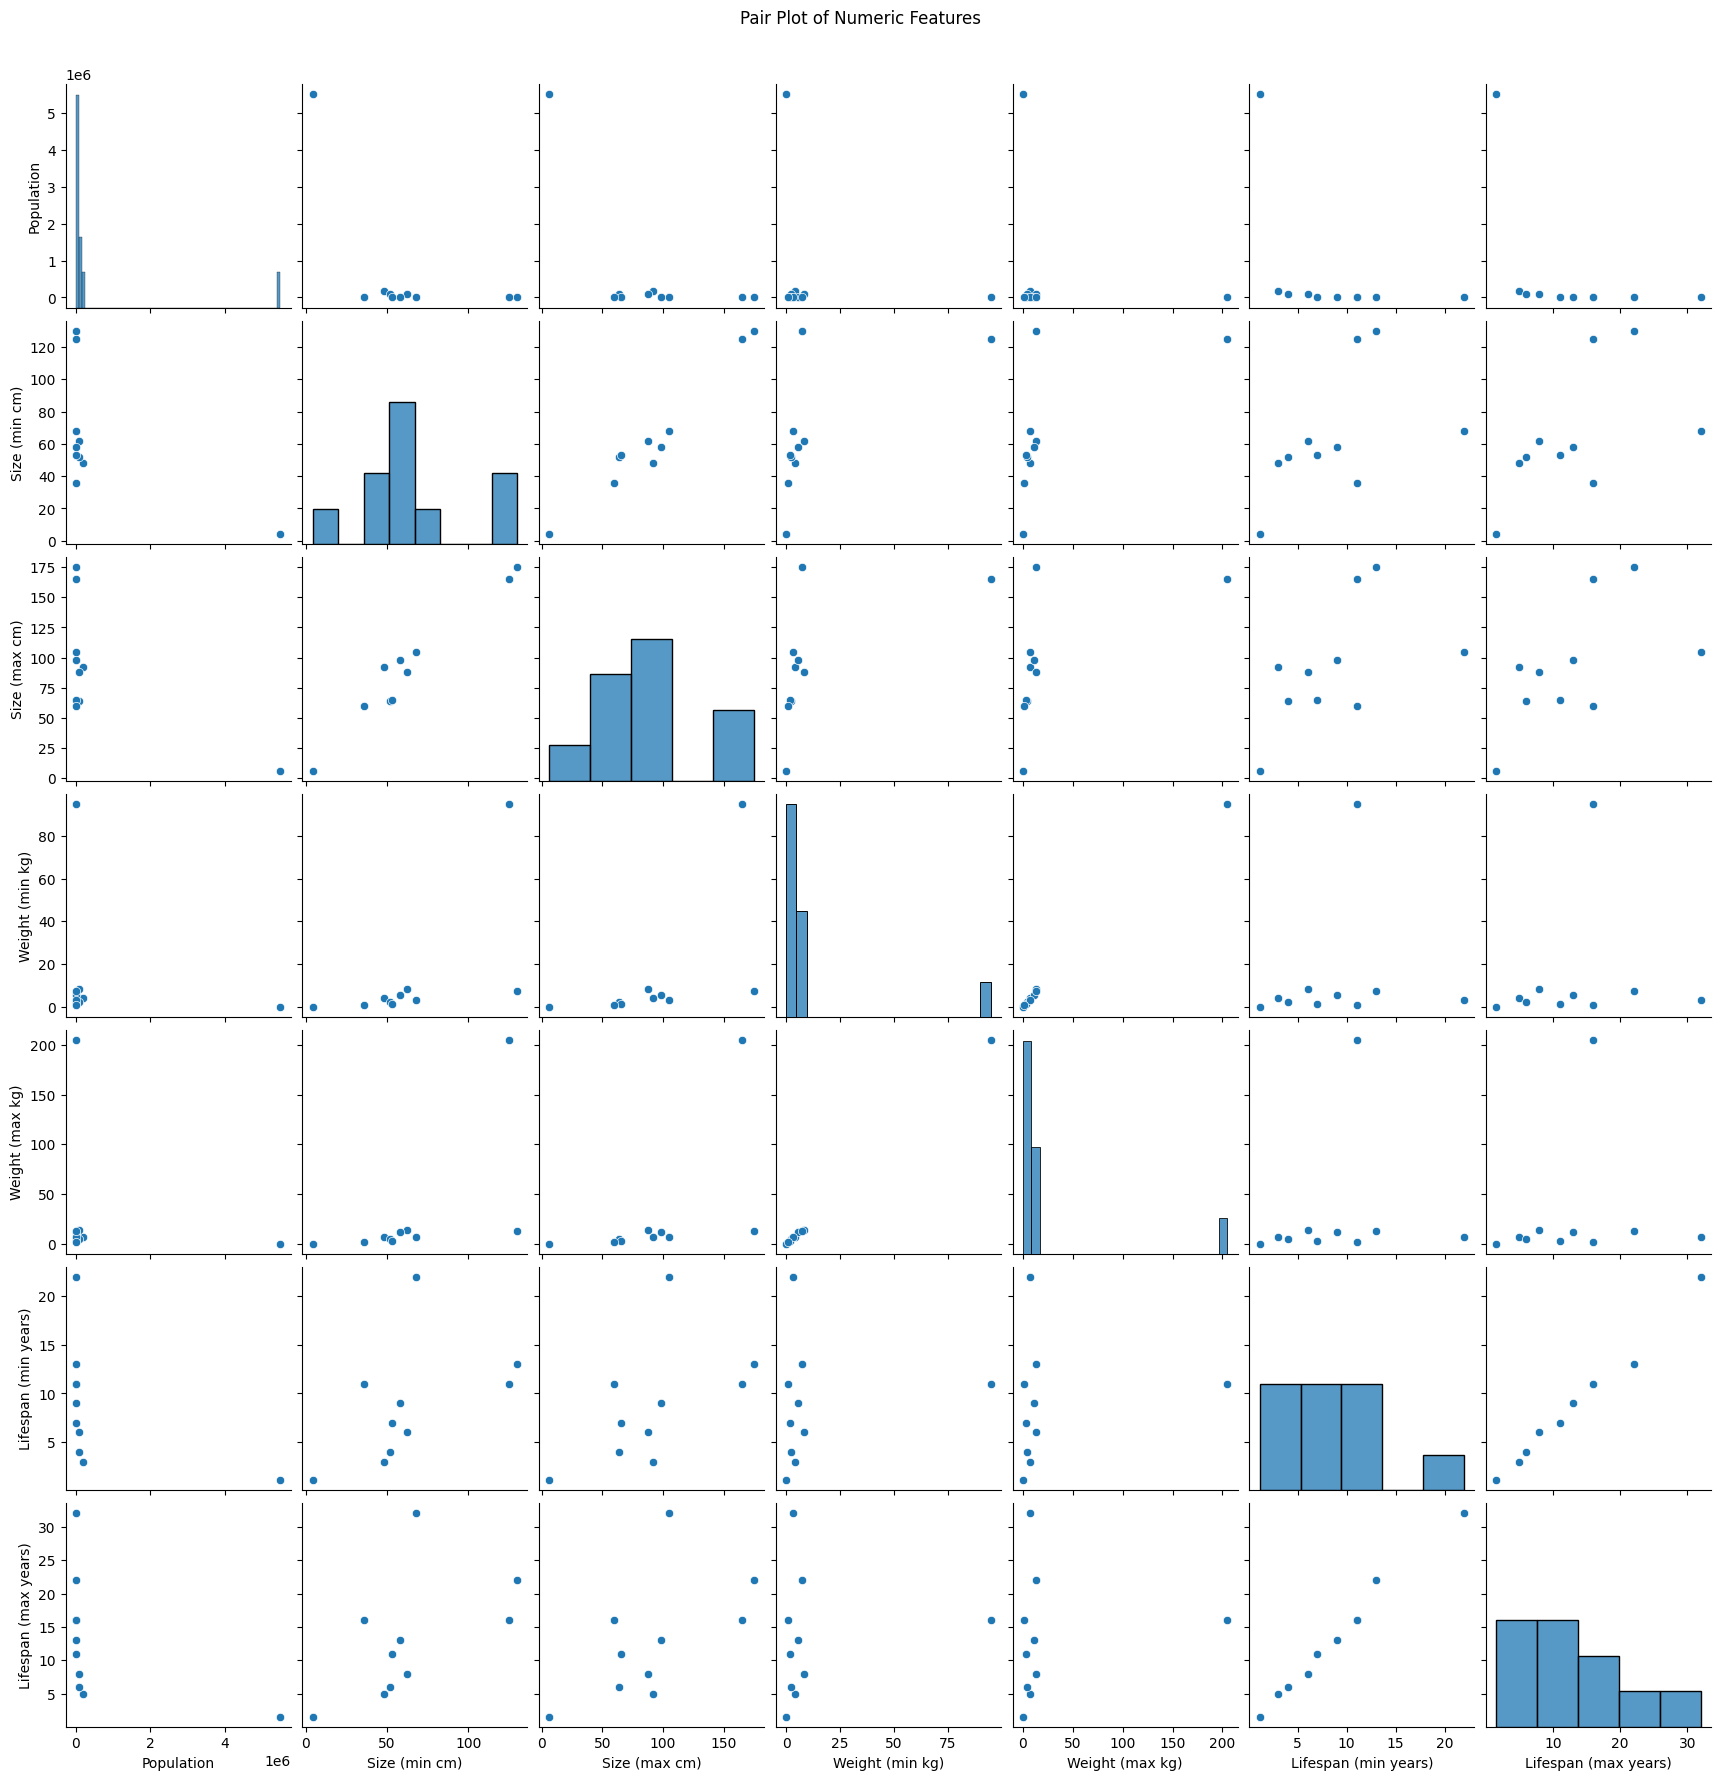

In [15]:
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

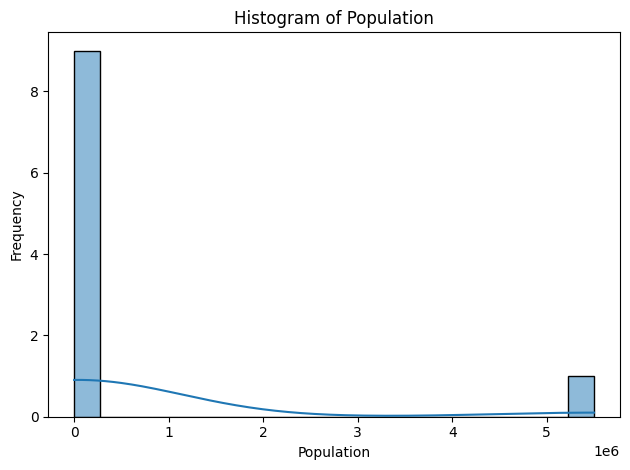

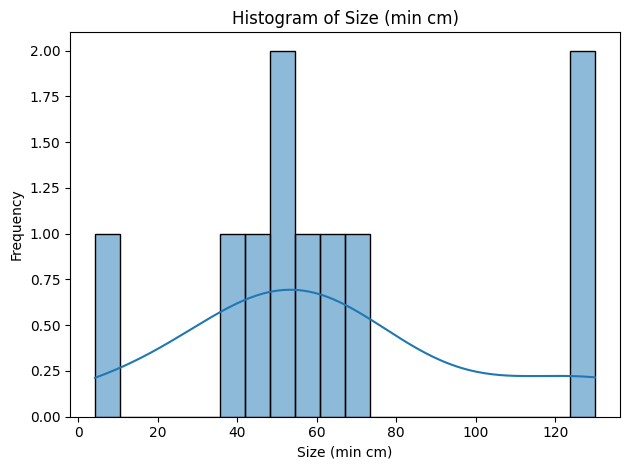

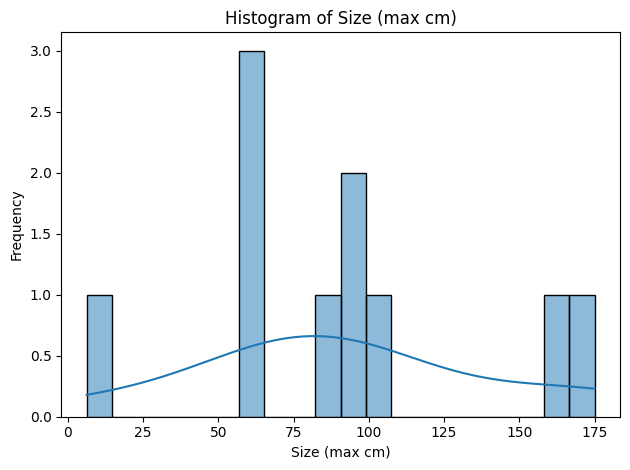

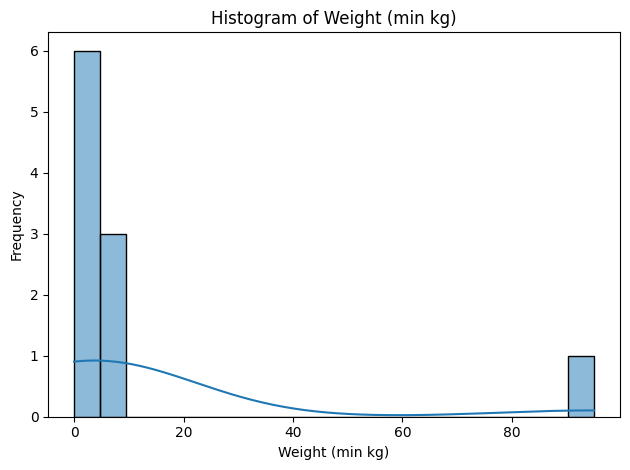

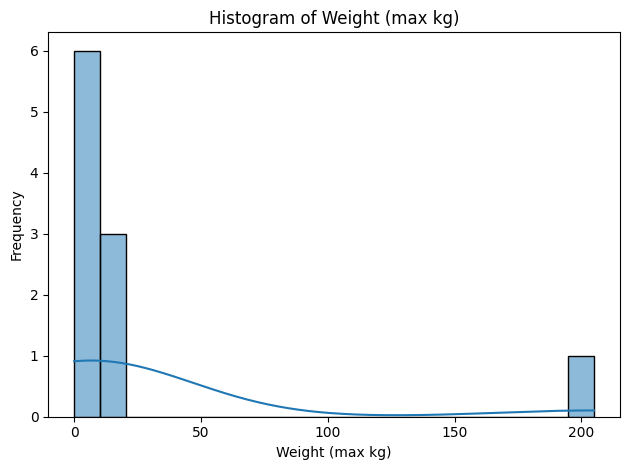

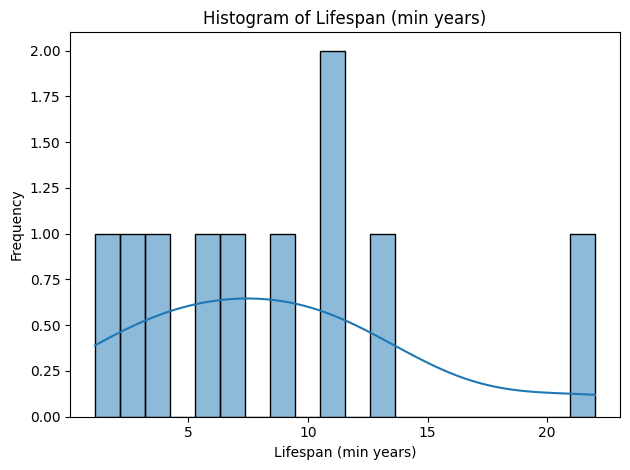

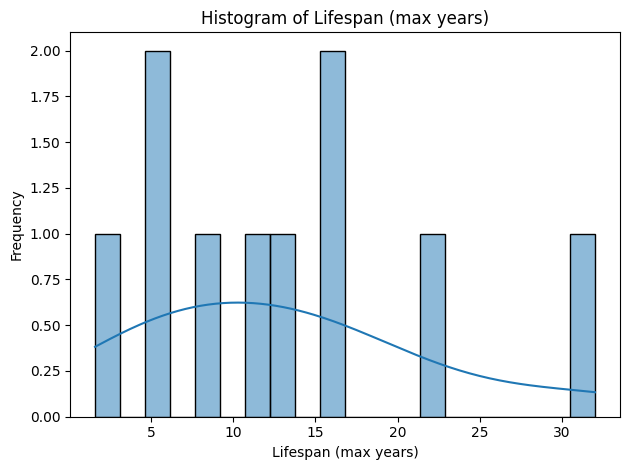

In [16]:
# Histograms for each numeric column
numeric_columns = numeric_df.columns

for col in numeric_columns:
    plt.figure()
    sns.histplot(numeric_df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

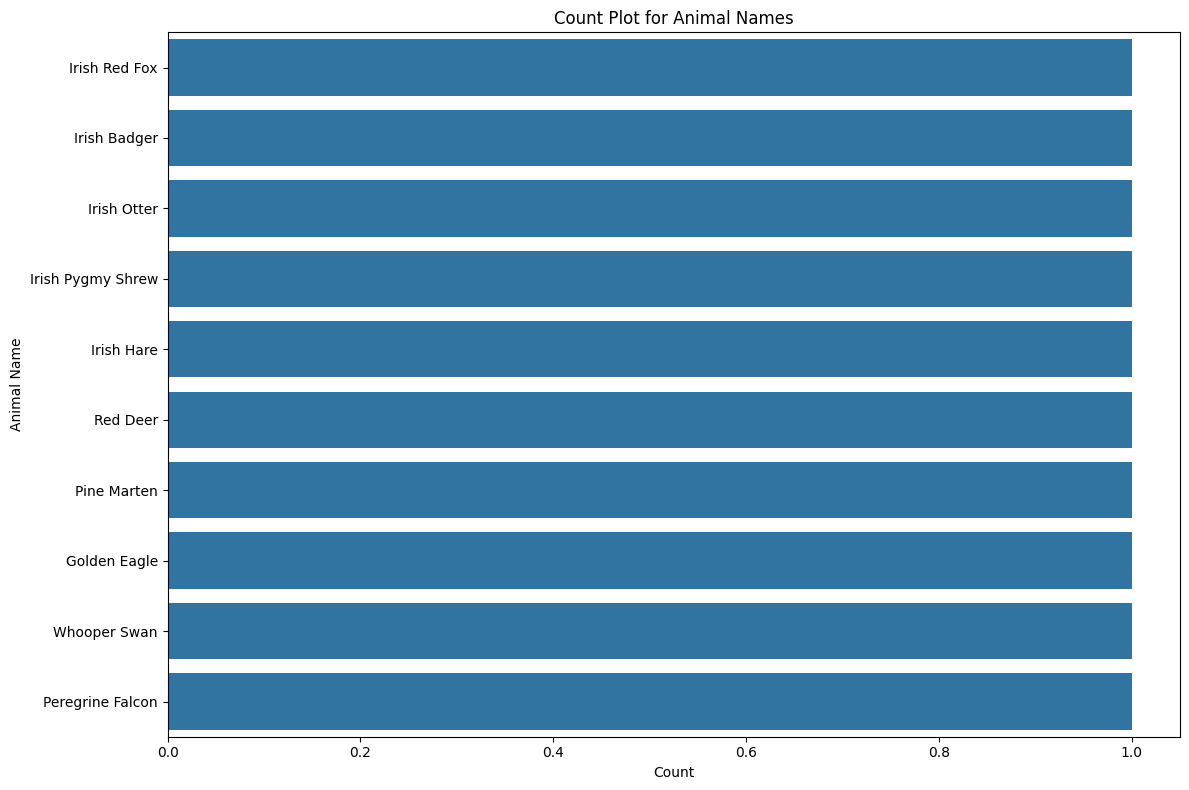

In [17]:
# Pie Chart / Count Plot for categorical 'Name' column
plt.figure(figsize=(12, 8))
sns.countplot(y='Name', data=df, order=df['Name'].value_counts().index)
plt.title('Count Plot for Animal Names')
plt.xlabel('Count')
plt.ylabel('Animal Name')
plt.tight_layout()
plt.show()

In [20]:
# Most and least abundant species
most_abundant = df.loc[df['Population'].idxmax()]
least_abundant = df.loc[df['Population'].idxmin()]

In [21]:
most_abundant

,3
Name,Irish Pygmy Shrew
Population,5500000
Size (min cm),4.2
Size (max cm),6.3
Weight (min kg),0.0032
Weight (max kg),0.0065
Lifespan (min years),1.1
Lifespan (max years),1.6


In [22]:
least_abundant

,7
Name,Golden Eagle
Population,20
Size (min cm),68.0
Size (max cm),105.0
Weight (min kg),3.2
Weight (max kg),6.8
Lifespan (min years),22.0
Lifespan (max years),32.0


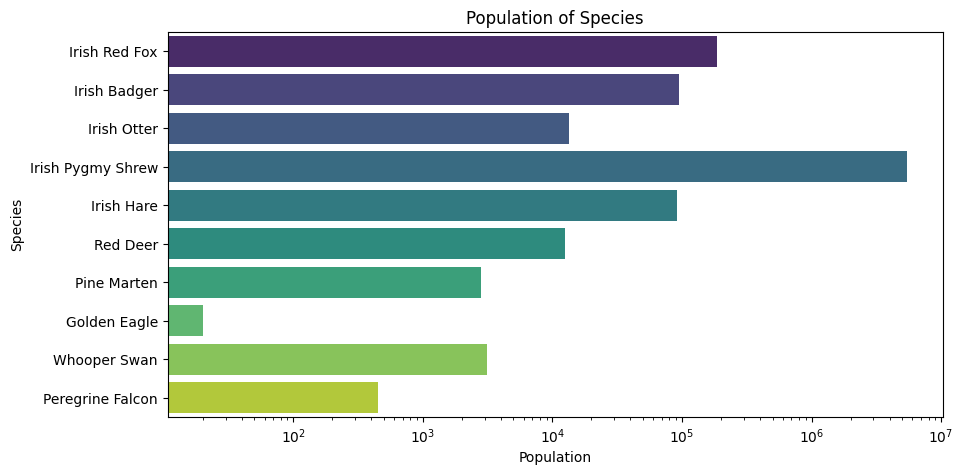

In [23]:
# Plot population distribution
plt.figure(figsize=(10, 5))
sns.barplot(x='Population', y='Name', data=df, palette='viridis')
plt.xlabel("Population")
plt.ylabel("Species")
plt.title("Population of Species")
plt.xscale("log")  # Log scale to handle large differences
plt.show()

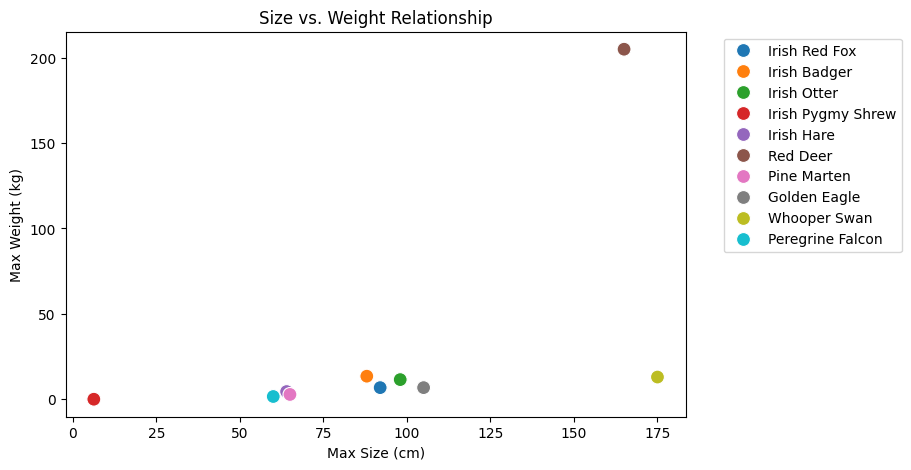

In [24]:
# Scatter plot of size vs. weight
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Size (max cm)', y='Weight (max kg)', data=df, hue='Name', palette='tab10', s=100)
plt.xlabel("Max Size (cm)")
plt.ylabel("Max Weight (kg)")
plt.title("Size vs. Weight Relationship")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
# Correlation analysis
correlation = df[['Size (max cm)', 'Weight (max kg)']].corr()
print("Correlation between Size and Weight:")
print(correlation)

Correlation between Size and Weight:
                 Size (max cm)  Weight (max kg)
Size (max cm)         1.000000         0.565588
Weight (max kg)       0.565588         1.000000


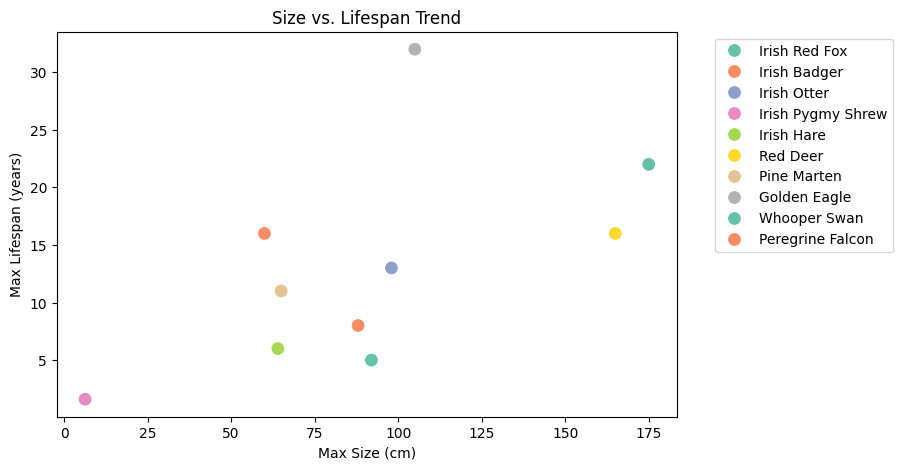

In [26]:
# Scatter plot of size vs. lifespan
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Size (max cm)', y='Lifespan (max years)', data=df, hue='Name', palette='Set2', s=100)
plt.xlabel("Max Size (cm)")
plt.ylabel("Max Lifespan (years)")
plt.title("Size vs. Lifespan Trend")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
correlation_lifespan = df[['Size (max cm)', 'Lifespan (max years)']].corr()
print("Correlation between Size and Lifespan:")
print(correlation_lifespan)

Correlation between Size and Lifespan:
                      Size (max cm)  Lifespan (max years)
Size (max cm)              1.000000              0.584898
Lifespan (max years)       0.584898              1.000000


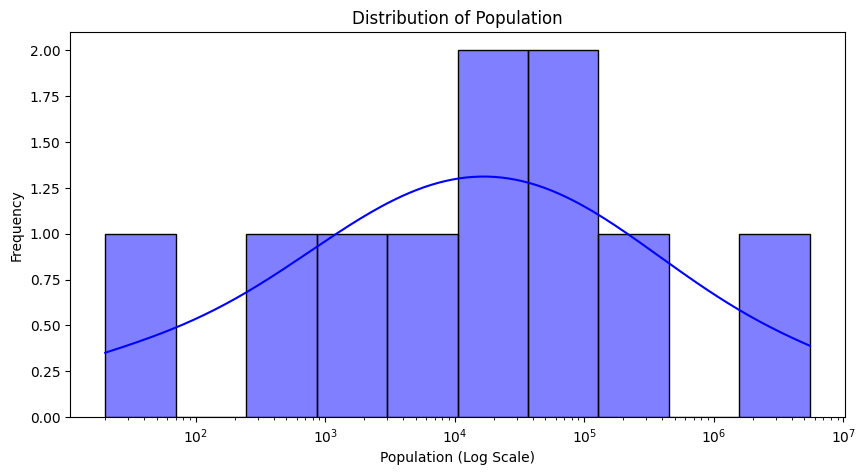

In [28]:
# 1. Distribution of Population
plt.figure(figsize=(10, 5))
sns.histplot(df['Population'], bins=10, kde=True, color='blue', log_scale=True)
plt.xlabel("Population (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Population")
plt.show()

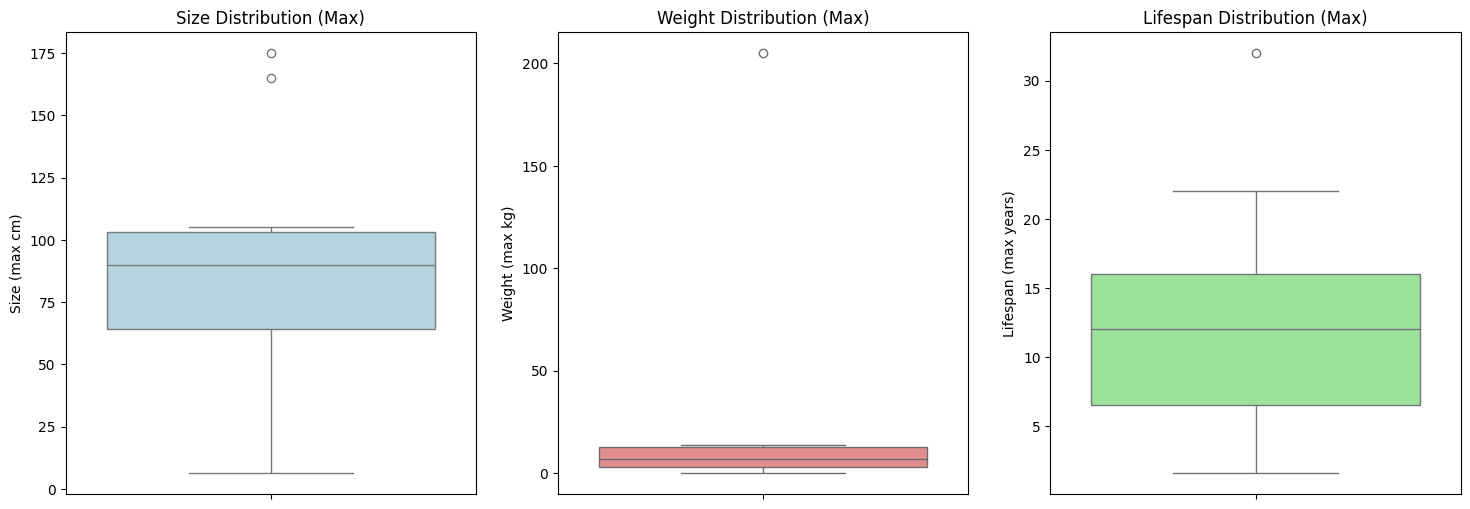

In [29]:
# 2. Boxplots for Size, Weight, and Lifespan
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df['Size (max cm)'], ax=axes[0], color='lightblue')
axes[0].set_title("Size Distribution (Max)")

sns.boxplot(y=df['Weight (max kg)'], ax=axes[1], color='lightcoral')
axes[1].set_title("Weight Distribution (Max)")

sns.boxplot(y=df['Lifespan (max years)'], ax=axes[2], color='lightgreen')
axes[2].set_title("Lifespan Distribution (Max)")

plt.show()

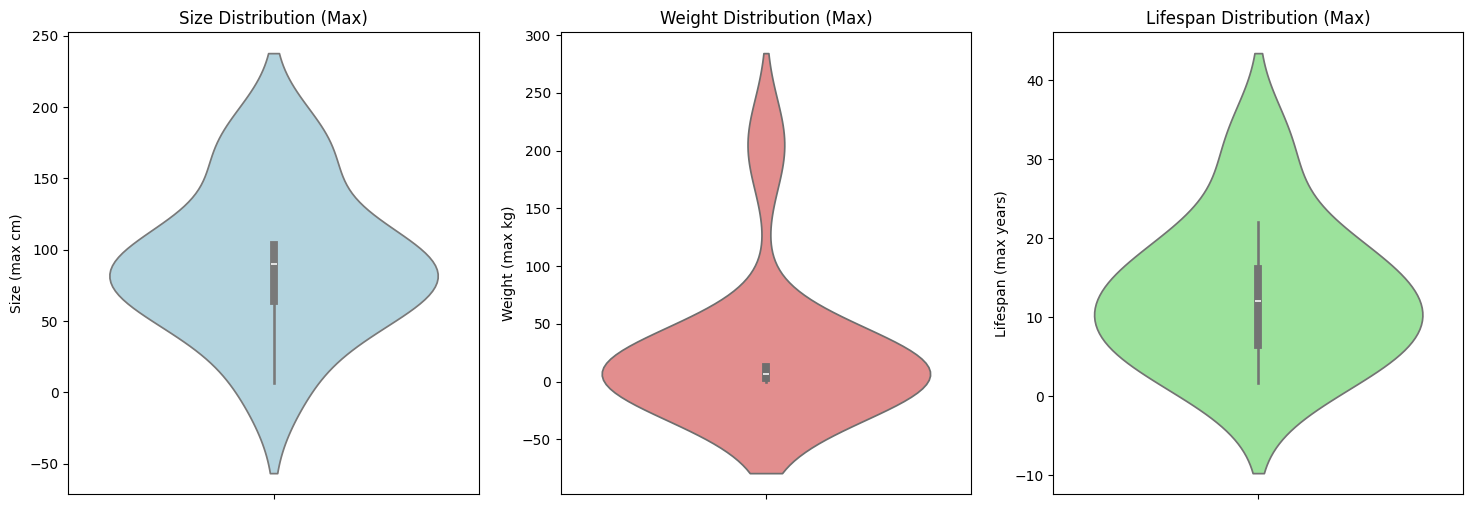

In [30]:
# 3. Violin Plots for Size, Weight, and Lifespan
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(y=df['Size (max cm)'], ax=axes[0], color='lightblue')
axes[0].set_title("Size Distribution (Max)")

sns.violinplot(y=df['Weight (max kg)'], ax=axes[1], color='lightcoral')
axes[1].set_title("Weight Distribution (Max)")

sns.violinplot(y=df['Lifespan (max years)'], ax=axes[2], color='lightgreen')
axes[2].set_title("Lifespan Distribution (Max)")

plt.show()

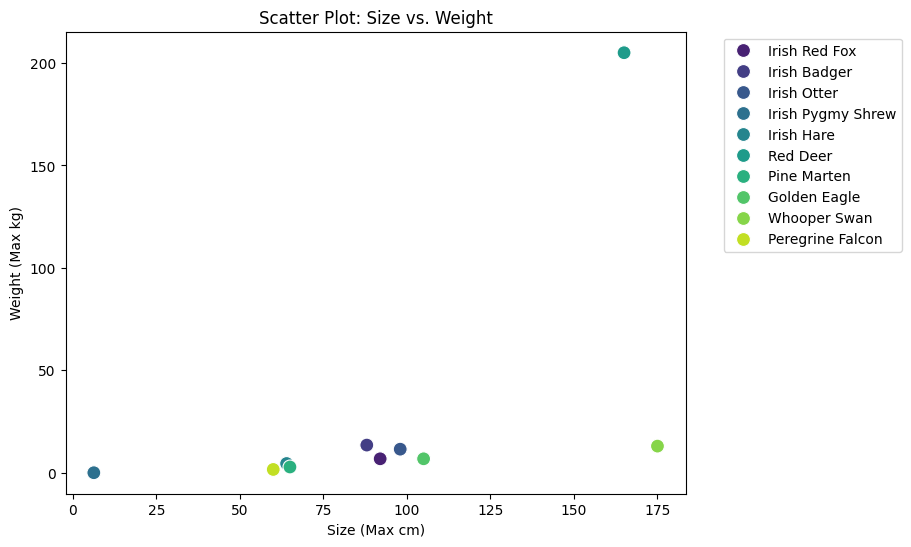

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Size (max cm)'], y=df['Weight (max kg)'], hue=df['Name'], palette='viridis', s=100)
plt.xlabel("Size (Max cm)")
plt.ylabel("Weight (Max kg)")
plt.title("Scatter Plot: Size vs. Weight")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

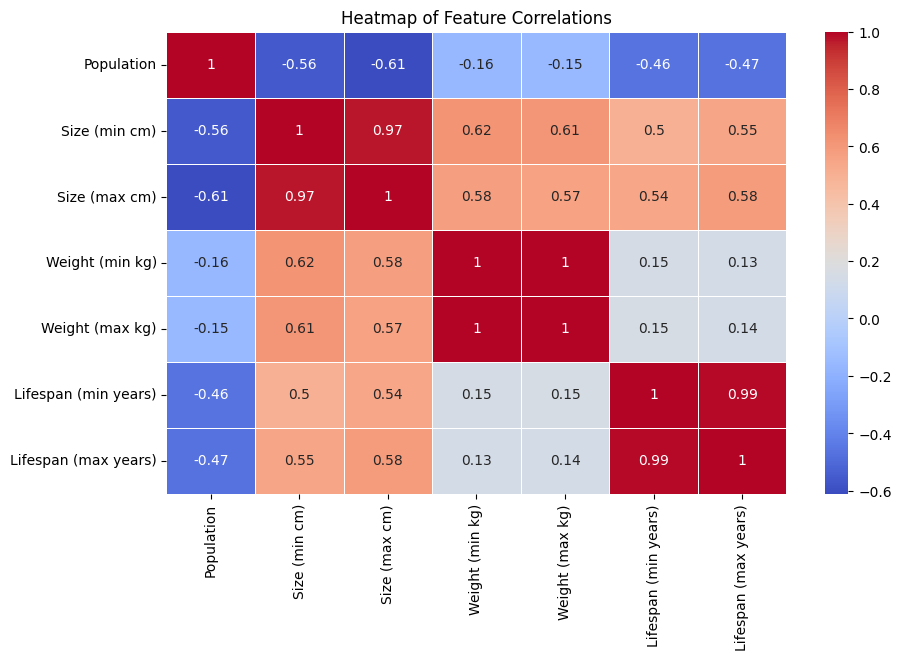

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['Name']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

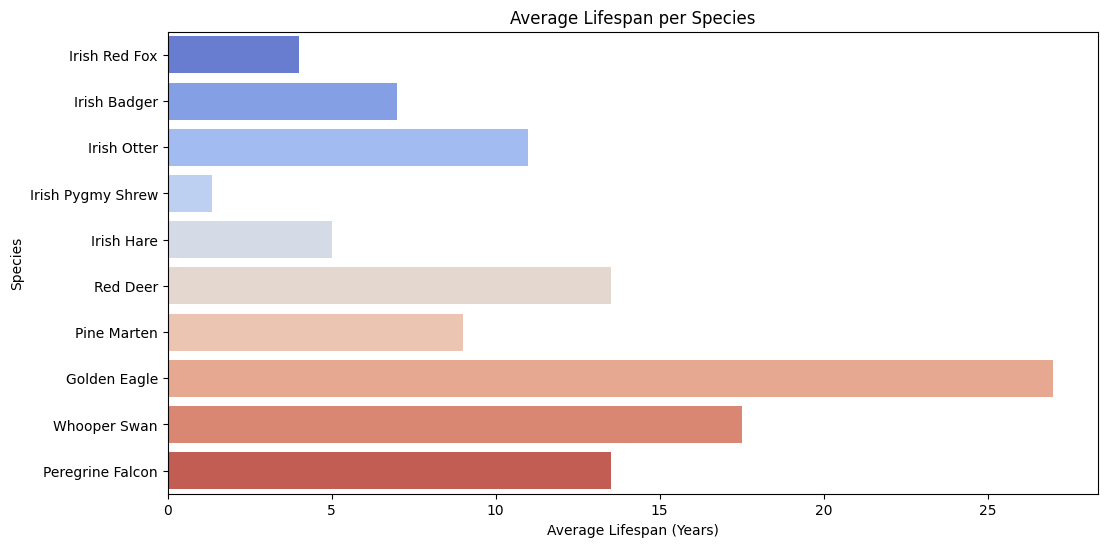

In [33]:
df['Avg Lifespan'] = (df['Lifespan (min years)'] + df['Lifespan (max years)']) / 2

plt.figure(figsize=(12, 6))
sns.barplot(x='Avg Lifespan', y='Name', data=df, palette='coolwarm')
plt.xlabel("Average Lifespan (Years)")
plt.ylabel("Species")
plt.title("Average Lifespan per Species")
plt.show()

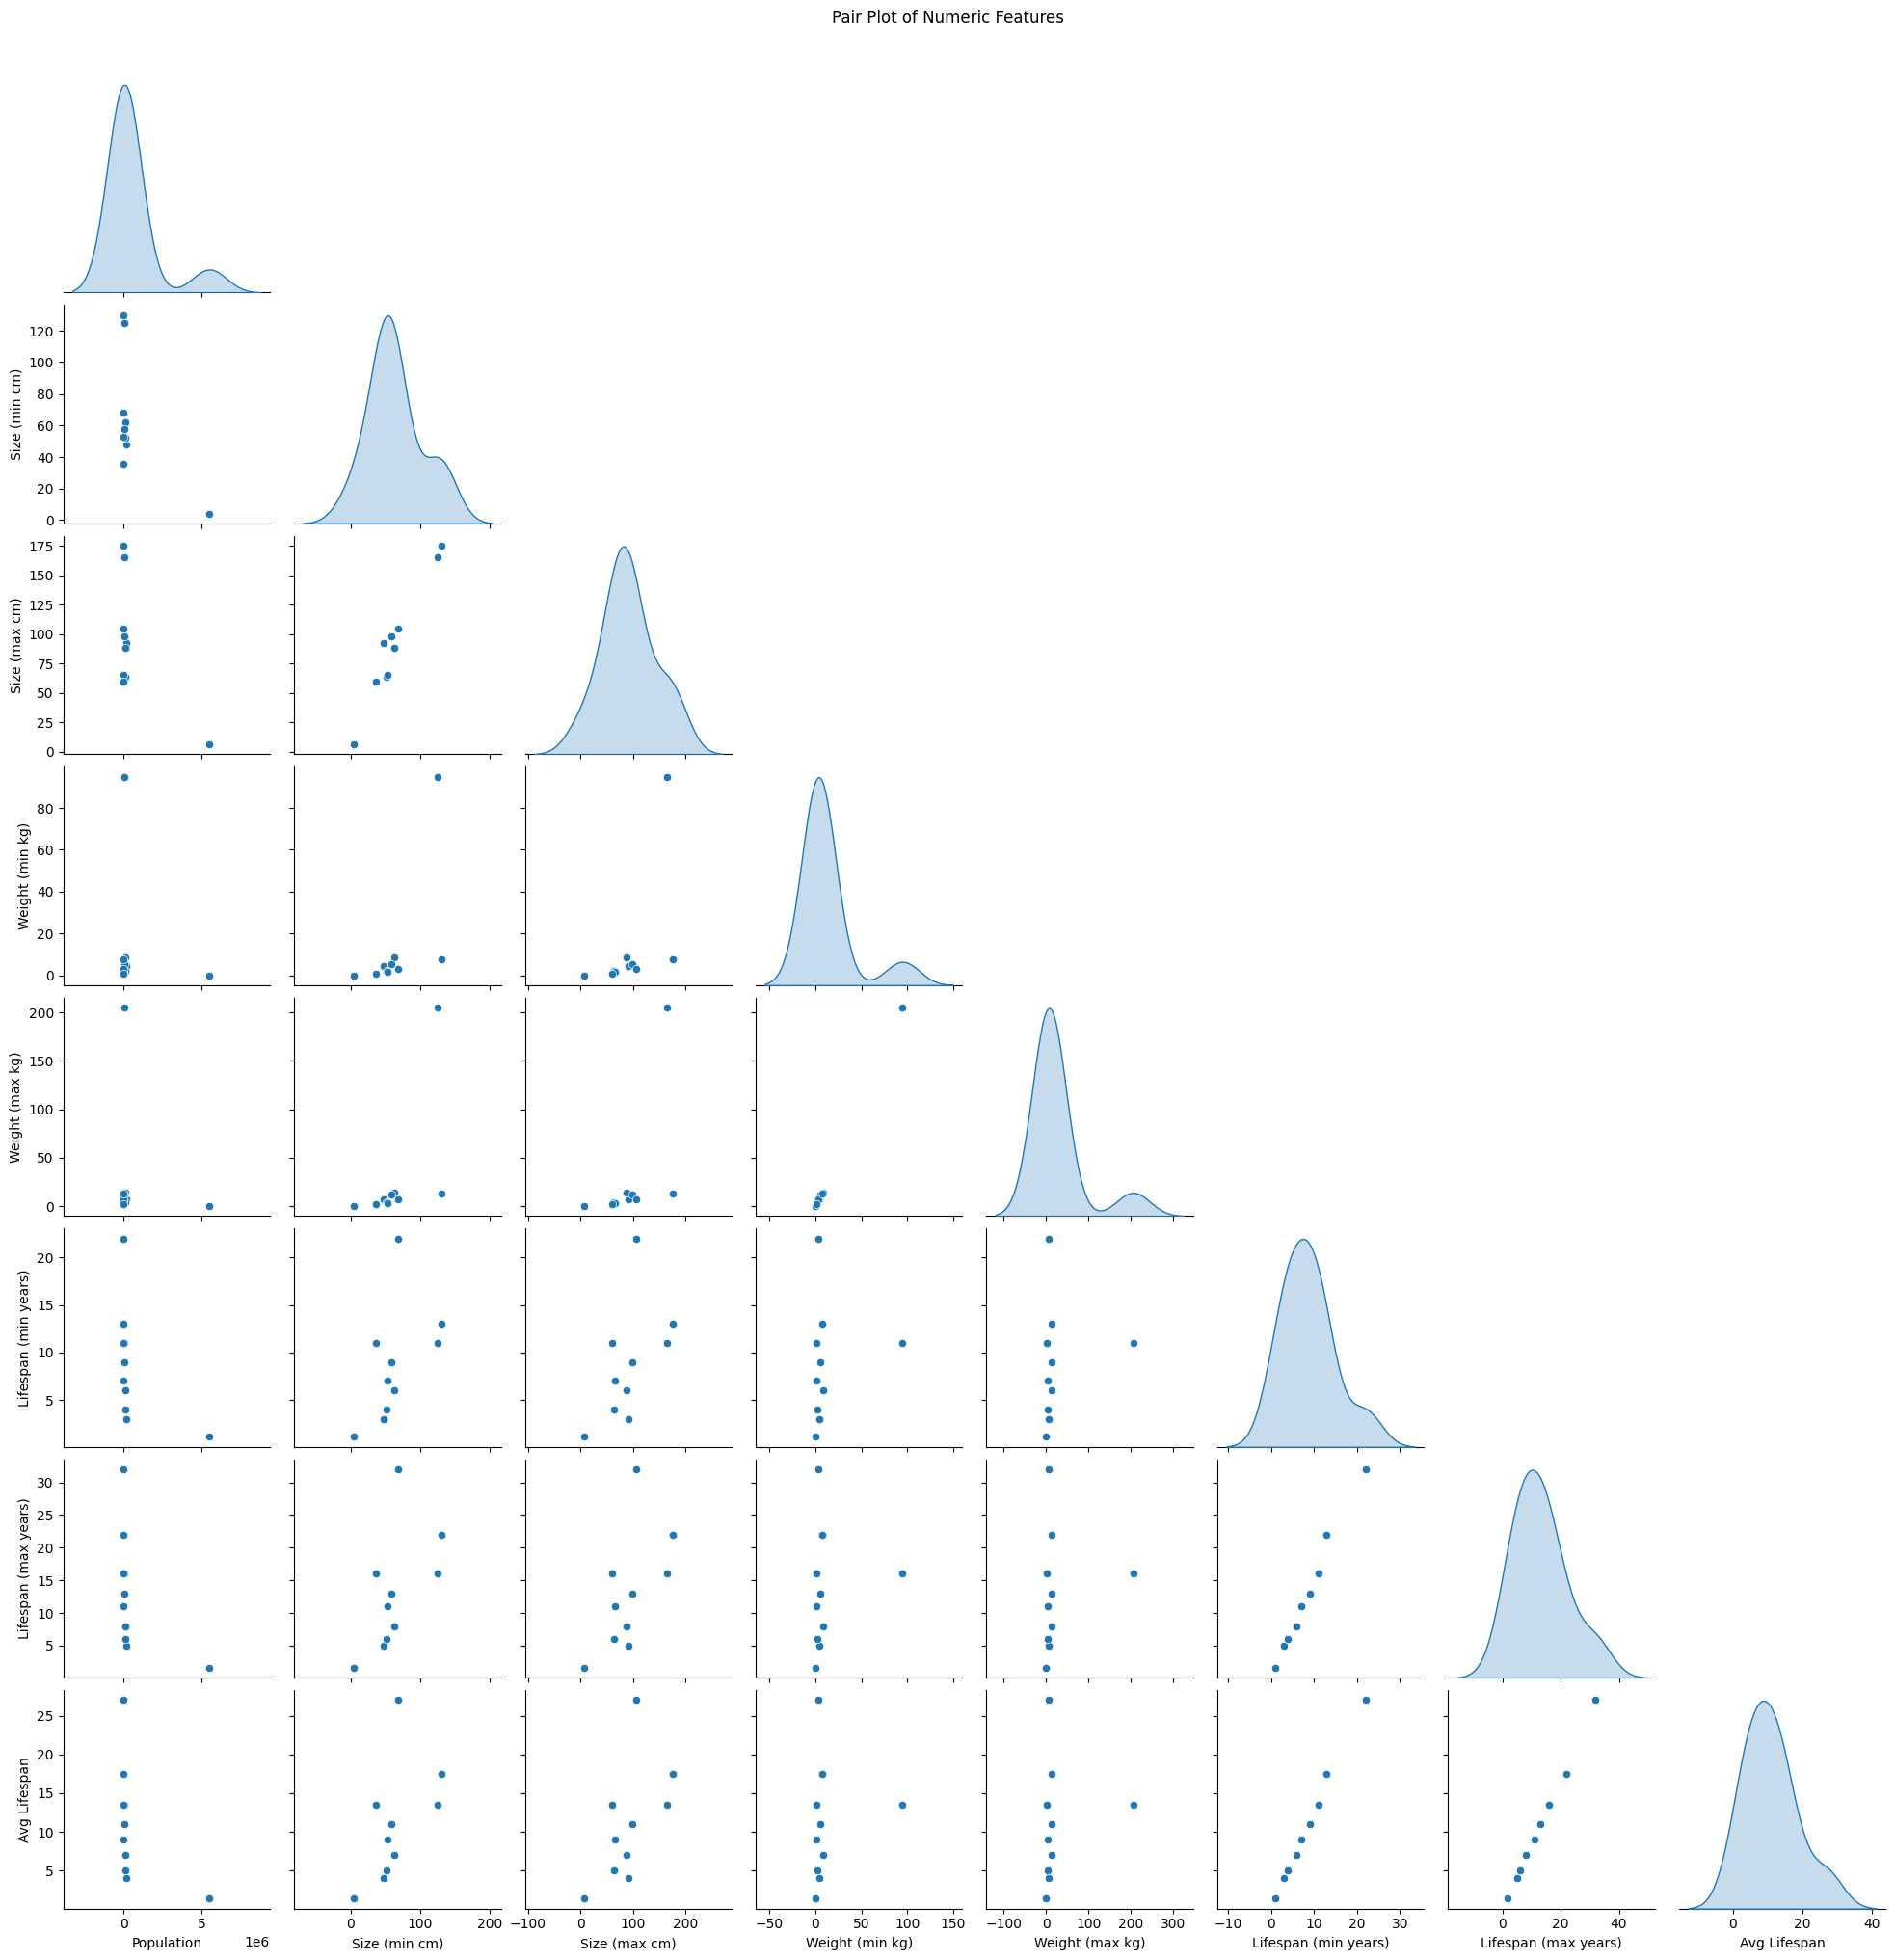

In [35]:
### **1. Pair Plot: Relationships Between Multiple Features** ###
sns.pairplot(df.drop(columns=['Name']), diag_kind='kde', corner=True, palette='viridis')
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

In [36]:
# Create new features: average size, weight, and lifespan
df['avg_size'] = (df['Size (min cm)'] + df['Size (max cm)']) / 2
df['avg_weight'] = (df['Weight (min kg)'] + df['Weight (max kg)']) / 2
df['avg_lifespan'] = (df['Lifespan (min years)'] + df['Lifespan (max years)']) / 2

In [37]:
# Define features and target variable
features = ['avg_size', 'avg_weight', 'avg_lifespan']
target = 'Population'

In [41]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
df = df.drop_duplicates()

Number of duplicate rows: 0


In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [44]:
# Selecting numerical features for clustering
features = ['Size (max cm)', 'Weight (max kg)', 'Lifespan (max years)', 'Population']
X = df[features]

In [45]:
# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Applying K-Means Clustering (choosing 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

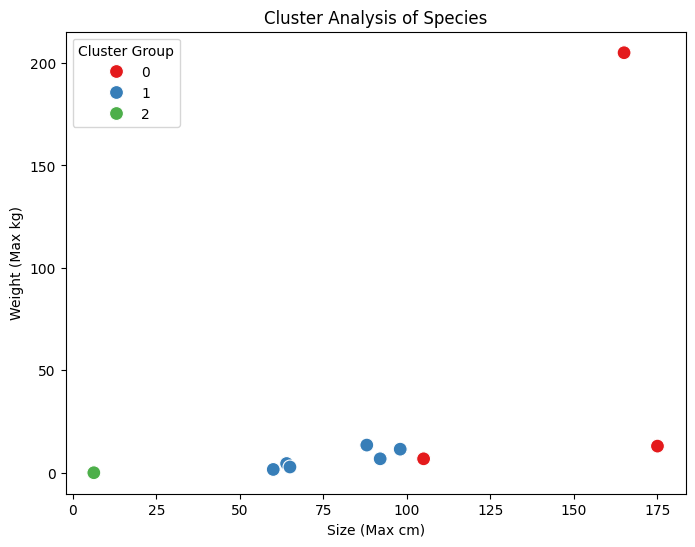

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Size (max cm)'], y=df['Weight (max kg)'], hue=df['Cluster'], palette='Set1', s=100)
plt.xlabel("Size (Max cm)")
plt.ylabel("Weight (Max kg)")
plt.title("Cluster Analysis of Species")
plt.legend(title="Cluster Group")
plt.show()

In [48]:
print(df[['Name', 'Cluster']])

                Name  Cluster
0      Irish Red Fox        1
1       Irish Badger        1
2        Irish Otter        1
3  Irish Pygmy Shrew        2
4         Irish Hare        1
5           Red Deer        0
6        Pine Marten        1
7       Golden Eagle        0
8       Whooper Swan        0
9   Peregrine Falcon        1


In [49]:
import numpy as np
from sklearn.cluster import KMeans

In [50]:
# Define the range of cluster numbers to test
k_values = range(1, 11)  # Testing for 1 to 10 clusters
wcss = []

In [51]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances of samples to their closest cluster center

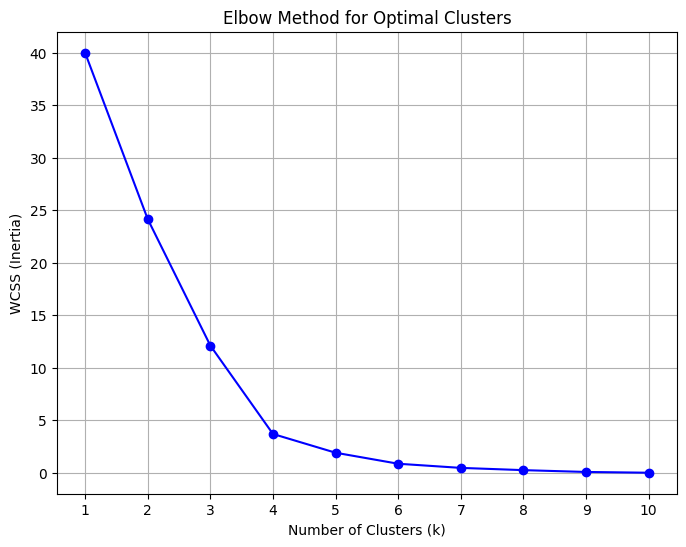

In [52]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal Clusters")
plt.xticks(k_values)
plt.grid(True)
plt.show()